In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.makedirs('img', exist_ok=True)

# Логистичка функција

Можемо сматрати да је логистичка функција настала модификовањем експоненцијалне за описивање раста који креће као експоненцијалан, али на крају има неко горње ограничење. Ако би експоненцијалну функциу записивали у облику:

$$g(t) = cr^t$$

онда одговарајућа 

$$g(t) = r^{t-t_p}{L\over r^{t-t_p} + 1}$$

Где $L$ горње ограничење, а $t_p$ превојна тачка када. Под претпоставком $r>1$, крива функције из фазе где постаје све стрмија прелази  у фазу да има све мањи нагиб и почиње да се приближава вредности $L$.

Погледајмо како то изгледа за конкретне вредности параметара.

In [2]:
L = 1000
r = 1.2
tp = 30

Нацртајмо граф функције на интервалу $[0,60]$

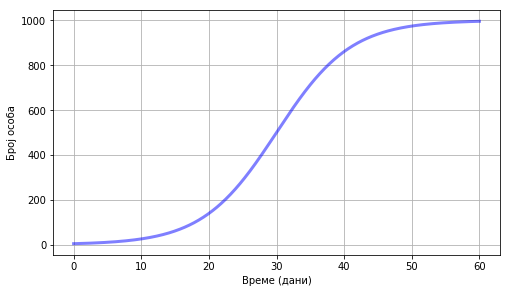

In [3]:
t = np.linspace(0, 60, 601) # размак између тачака је 1/10
g = r**(t - tp) * L / (r**(t - tp) + 1)
plt.figure(figsize=(8,4.5))
plt.plot(t,g, 'blue', alpha=0.5, lw=3)
plt.grid(True)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.savefig("img/logisticka1.png", bbox_inches='tight', dpi=150)
plt.show()

На слици се јасно препознаје превојна тачка $t_p=30$ и горње ограничење $L=1000$. Видимо да крива има облик слова *S* и пресликава скуп свих реалних бројева на коначни интервал. Логистичка функција је најчешће коришћења таква функција.

У епидемиолошким моделима се функција користи за представљање укупног броја заражених особа. Зато смо је означили са $g$ како у овом курсу обично означавамо такву функцију.

Ако раставимо $r^{t-t_p}$ у количник добијамо

$$g(t) = r^{t-t_p}{L\over r^{t-t_p} + 1} = {L\over r^{t_p}}r^t{1\over r^{t-t_p} + 1}$$

За вредности $t$ које су много мање од $t_p$ израз $1\over r^{t-t_p} + 1$ је врло близу $1$, што значи да је на почетку функција лична експоненцијалној

$$ g_e(t) = {L\over r^{t_p}}r^t$$

Погледајмо то на графику.

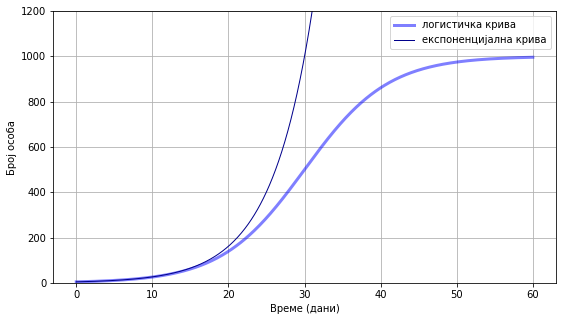

In [4]:
c = L/(r**tp)
ge = c*(r**t)
plt.figure(figsize=(9,5))
plt.plot(t,g, 'blue', alpha=0.5, lw=3, label = 'логистичка крива')
plt.plot(t,ge, 'darkblue',lw=1, label= 'експоненцијална крива')
plt.grid(True)
plt.ylim(0,1200)
plt.legend()
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.savefig("img/logisticka1a.png", bbox_inches='tight', dpi=150)
plt.show()

Видимо да се на почетку експоненцијална и логистичка крива скоро не разликују.

Функција за број новозаражених математички може израчинати из $g(t)$ на следећи начин

In [5]:
f = np.gradient(g,t[1]-t[0])

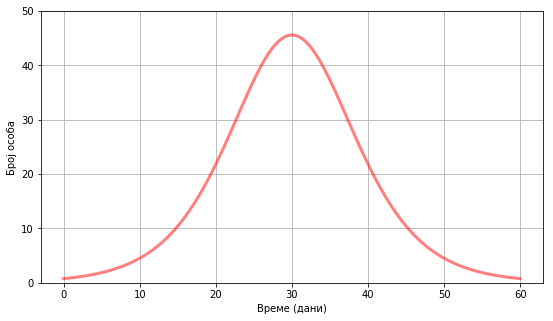

In [6]:
plt.figure(figsize=(9,5))
plt.plot(t,f, 'red', alpha=0.5, lw=3)
plt.grid(True)
plt.ylim(0,50)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.savefig("img/logisticka2.png", bbox_inches='tight', dpi=150)
plt.show()

Додаћемо експоненцијалну криву.

У лекцији смо рекли да је код експоненцијалног раста и финкција за укупан број заражених и функција за број новозаражених експоненцијална. То значи да а кад израчунамо функцију за број новозаражених која одговара $g_e(t)$, то ће опет бити експоненцијална функција

In [7]:
fe = np.gradient(ge,t[1]-t[0])

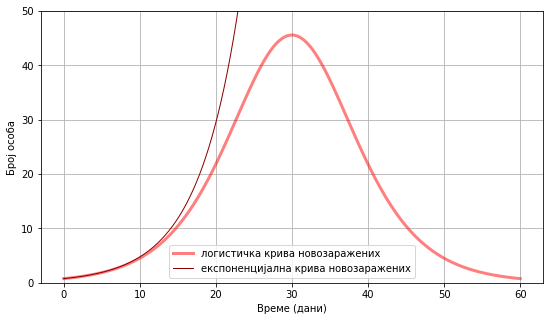

In [8]:
plt.figure(figsize=(9,5))
plt.plot(t,f, 'red', alpha=0.5, lw=3, label = 'логистичка крива новозаражених')
plt.plot(t,fe, 'darkred',lw=1, label= 'експоненцијална крива новозаражених')
plt.grid(True)
plt.ylim(0,50)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.legend()
plt.savefig("img/logisticka2a.png", bbox_inches='tight', dpi=150)
plt.show()